
#  <span style="color:#2F4F4F">Validação Modelos Clusterização [22E4_2]</span>

**Erik Tavares dos Anjos** </br>
Atualizado: 18/12/2022 </br>
Git: https://github.com/eriktavares/val_clustering </br></br>


##  <span style="color:#2F4F4F">Infraestrutura</span>
Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:






Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses</br>
arquivos deverá ser enviado compactado no moodle).

**Você está rodando em Python 3.9+** </br>

In [1]:
from platform import python_version
print("Current Python Version-", python_version())

Current Python Version- 3.9.15


**Você está usando um ambiente virtual: Virtualenv ou Anaconda </br>**

Ambiente Anaconda

In [2]:
!conda --version

conda 22.9.0


**Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico </br>**

Um ambiente  environment do Anaconda chamado "Cluster" foi criado para rodar o exercício

In [3]:
!conda info


     active environment : Cluster
    active env location : C:\Users\Erik\.conda\envs\Cluster
            shell level : 2
       user config file : C:\Users\Erik\.condarc
 populated config files : C:\Users\Erik\.condarc
          conda version : 22.9.0
    conda-build version : 3.22.0
         python version : 3.9.7.final.0
       virtual packages : __win=0=0
                          __archspec=1=x86_64
       base environment : C:\ProgramData\Anaconda3  (read only)
      conda av data dir : C:\ProgramData\Anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          package cache :

**Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.** </br>

In [3]:
!conda env export > environment.txt --no-builds

**Tire um printscreen do ambiente que será usado rodando em sua máquina**. </br>

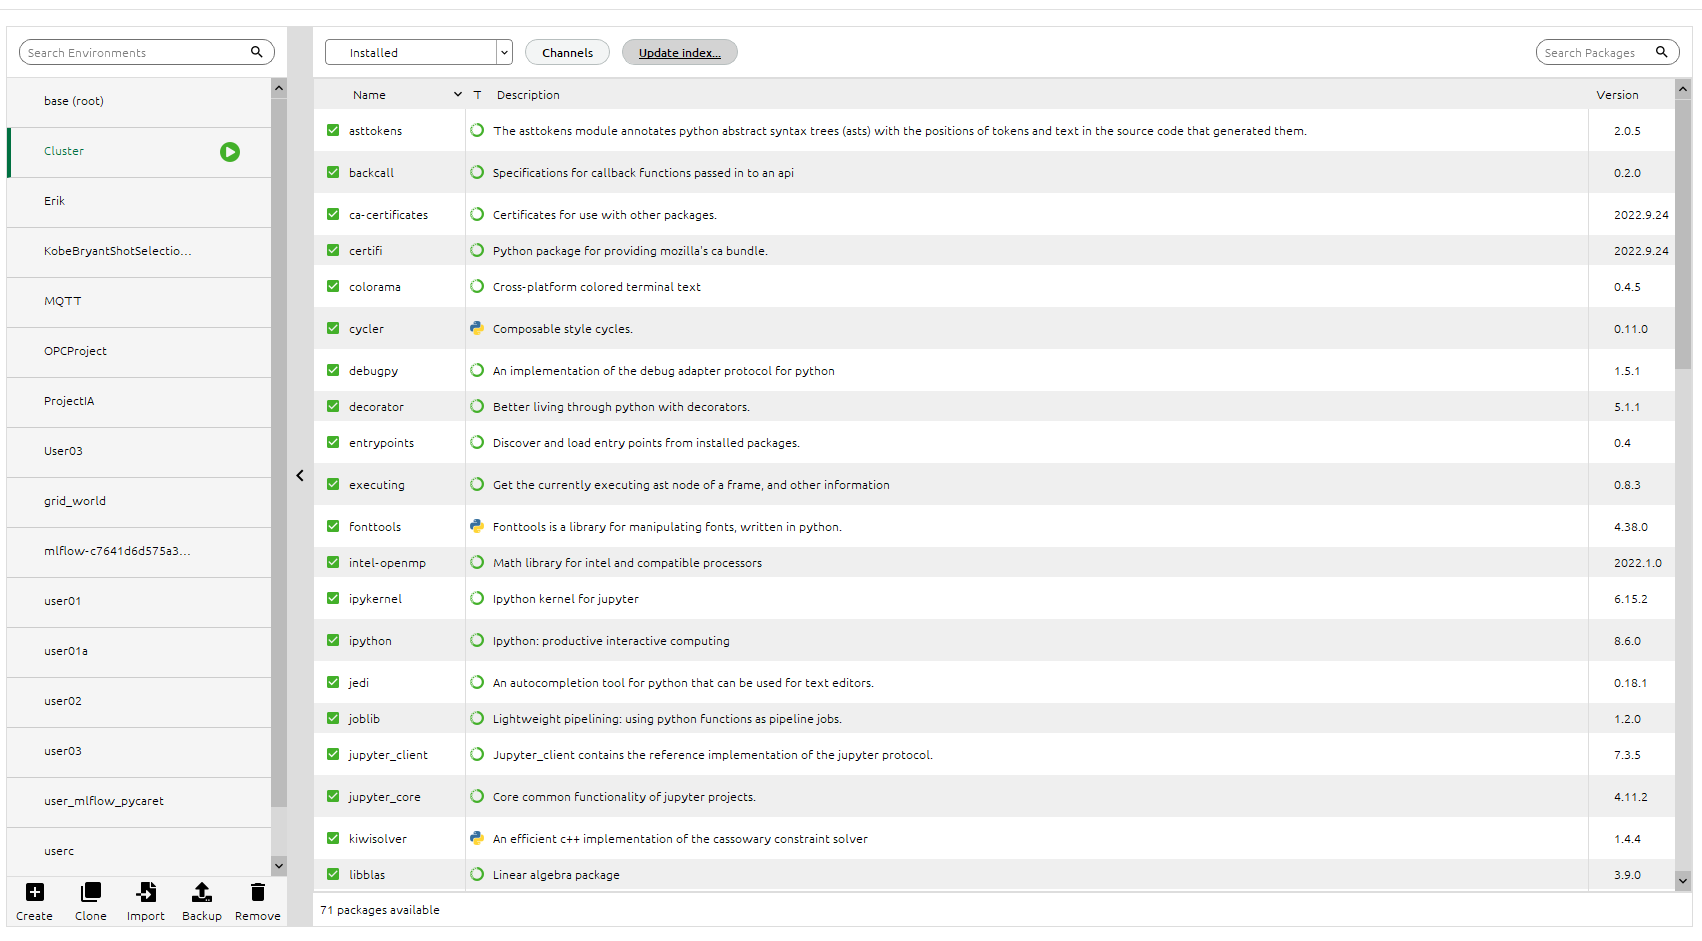

**Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).**

**Git: https://github.com/eriktavares/val_clustering** </br>

##  <span style="color:#2F4F4F">Escolha de base de dados</span>

**Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.**

**1. Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.**

A base escolhida foi **Customer Personality Analysis** do Kaggle, link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

**2. Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.**

É um tema bem atual para as abortagens de aprendizado no maquina no sentido de ter muita aplicação pratica para as empresas em diversos seguimentos. Agrupar clientes,
ou até mesmo contratos (generalizando a ideia), pode ser muito útil para elaboração de estrategias de negócios, identificação de tendências, identificação de novos nichos de forma as empresas se prepararem para acompanhar as tendências de mercado.

A segmentação de clientes é uma importante estrategia de negócios e pode gerar inumeros benéficios, por exemplo: Otimizar as estratégias de marketing e vendas, aumentar a receita e melhorar a experiência do cliente.

Base de dados na pasta/arquivo: </br> ../Data/raw/marketing_campaign.csv'

**3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?**

**Base completa**

In [3]:
import pandas as pd
df=pd.read_csv('../Data/raw/marketing_campaign.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


**4. Realize o pré-processamento adequado dos dados. Descreva os passos necessários.**

Antes da étapa de clusterização é preciso realizar o preprossessamento daos dados, onde é verificado dados faltantes, transformações em variáveis se necessário, remoção de outliers, seleção de features, normalização das fetures, e etc.

**Base apenas com dados informações do cliente**

A base possui muitas features, algumas com dados de clientes, produtos que esses clientes consomem, promoções e lugares.

Então a principio será selecionado apenas os dados pessoais dos clientes 9 features, com a eliminação da Dt_Customer (data de cadastro) porque não
agrega informação pessoal, ou comportamento. 

Melhor trabalhar com idade do que ano de nascimento, que idade fica representativa porque a idade é uma medida absoluta e independente do tempo, enquanto o ano de nascimento depende do contexto temporal em que está sendo usado. Isso significa que a idade pode ser mais fácil de comparar entre indivíduos e grupos, enquanto o ano de nascimento pode ser mais difícil de interpretar sem conhecer o contexto temporal (Entre ínumeros outros motivos).

Outro ponto é que Marital_Status tem diversos status e alguns são muito semelhantes, como Married e Together, ou Single e Alone. Parece ser a mesma coisa.
Então, será resumido em Married e Single. Casado no sentido pratico da palavra, se esta morando junto, esta casado, mesmo que não de forma formal.

E por fim, deixar somente casado = 1 e solteiro = 0.

Também somar o número de filhos adolecentes e crianças ('Kidhome', 'Teenhome'). E tudo foi agrupado em tamanho da família.

E por último realizar a conversão da Educação de categórica para Grau, atribuindo valores de 1 a 5 para cada grau estudado.

Também foi utilizado features de consumo de grupos de produtos, como carnes, doces, frutas e vinhos.

In [5]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

A educação pode ser definida como uma veriável númerica de 1 a 5, porque o 5 - PhD é maior que o 4 - Master, tem um grau a cima.

In [6]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Para evita que seja feito dois clusters, casado e solteiro, será atribuído um peso de 50% a essa feature.

In [7]:
import datetime

### Data de Nascimento em ídade
df['Age'] = datetime.datetime.now().year-df['Year_Birth']

## Ajuste do Marital_Status
df["Marital"]=df["Marital_Status"].replace({
    "Married":"Married", 
    "Together":"Married", 
    "Absurd":"Single", 
    "Widow":"Single", 
    "YOLO":"Single", 
    "Divorced":"Single", 
    "Alone": "Single",
    "Single":"Single"})
df['Married']=df["Marital"].replace({"Married": 1, "Single": 0})


## Soma número de filhos
df['Family']=1+df['Kidhome'] + df['Teenhome']+df['Married']

## Tratamento Educação
df['Degree'] = df['Education'].replace({
    "Basic":1,
    '2n Cycle':2,
    'Graduation': 3,
    'Master': 4,
    "PhD":5

})
##Gastos com diversos tipos de produtos nos últimos 2 anos
df['Spent']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

customer_features=['Age', 'Degree', 'Income', 'Family', 'Recency']
product_features=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_customer=df[customer_features+product_features]
df_customer.head()

,Age,Degree,Income,Family,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,66,3,58138.0,1,58,635,88,546,172,88,88
1,69,3,46344.0,3,38,11,1,6,2,1,6
2,58,3,71613.0,2,26,426,49,127,111,21,42
3,39,3,26646.0,3,26,11,4,20,10,3,5
4,42,5,58293.0,3,94,173,43,118,46,27,15


**Dados Nulos**

A base de dados possui alguns dados nulos

In [8]:
df_customer.isna().sum()

Age                  0
Degree               0
Income              24
Family               0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
dtype: int64

In [9]:
df_customer_dn=df_customer.dropna()
df_customer_dn.isna().sum()
df_customer_dn.reset_index(inplace=True, drop=True)

In [10]:
df_customer_dn.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2216.0,54.179603,11.985554,27.0,46.0,53.0,64.00,130.0
Degree,2216.0,3.459838,1.004825,1.0,3.0,3.0,4.00,5.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Family,2216.0,2.592509,0.905722,1.0,2.0,3.0,3.00,5.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0


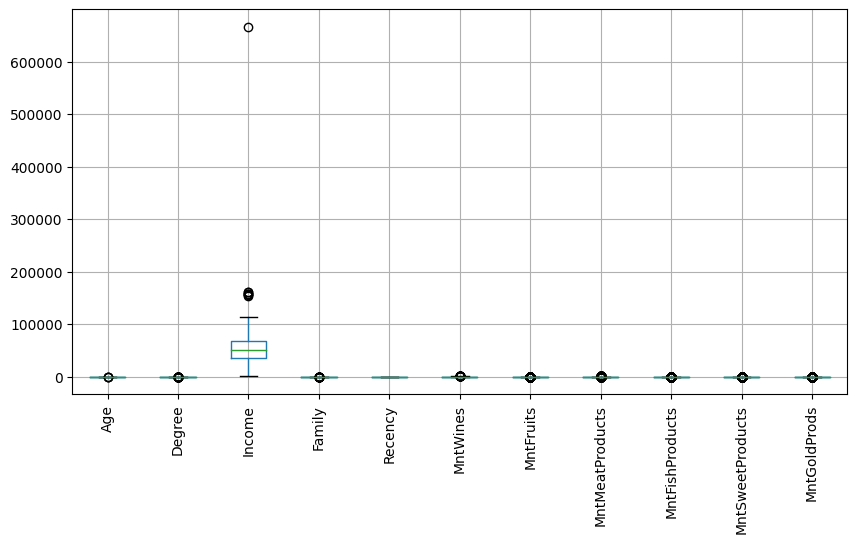

In [11]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
#df_features=df.drop()
 
fig = plt.figure(figsize =(10, 5))
# Creating plot
df_customer_dn.boxplot()
plt.xticks(rotation = 90)
# show plot
plt.show()

**Remoção de Outliears**

In [12]:
df_cm_dn_so=df_customer_dn[df_customer_dn['Income']<120000]
df_cm_dn_so=df_cm_dn_so[df_cm_dn_so['Age']<95]
df_cm_dn_so.reset_index(inplace=True, drop=True)

Última etapa, normalização

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_cm_dn_so)
df_customer_norm=scaler.transform(df_cm_dn_so)

##  <span style="color:#2F4F4F">Clusterização</span>

Para os dados pré-processados da etapa anterior você irá:

**1. Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:**

**K-Médias**
**DBScan**

**Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.**

Escolher o número ótimo de clusters depende muito da base de dados que está sendo utilizada, e também da necessidade especifica de trabalho com os resultados.
Os clusters escolhidos foram 2 clusters. Que pode ser visto como "caixa rápido ou mais de 30 itens", ou até mesmo clientes comumns e clientes especiais.


Alguns gráficos podem ajutar a justificar a escolha, como este de silhueta x Número de Clusters KMEANS com validação cruzada de 5 folds. Que indica 2 clusters.

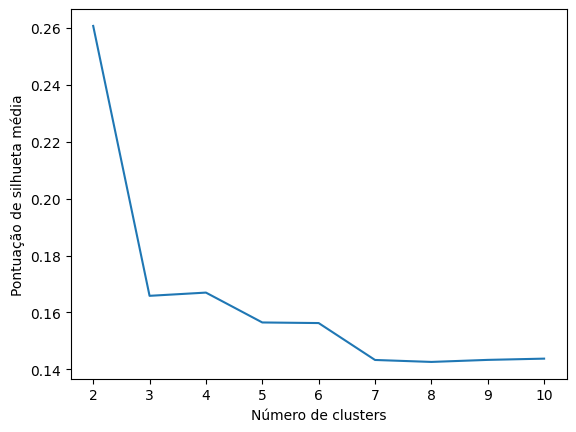

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
import warnings

# Ignorar todos os warnings
warnings.filterwarnings("ignore")

def cluster_kmeans(X, model, folds=5):
    kfold = KFold(n_splits=folds)
    results=[]
    for train_index, test_index in kfold.split(X):
        X_train = X[train_index]
        cluster = model.fit(X_train)
        results.append(silhouette_score(X_train, cluster.labels_))
    return results


# Definir os valores de n_clusters a serem testados
n_clusters_values = range(2, 11)
y=[]
# Inicializar listas para armazenar os resultados
scores = []
X=df_customer_norm
# Para cada valor de n_clusters, treinar o modelo usando validação cruzada
# e calcular a pontuação de silhueta média
for n_clusters in n_clusters_values:
    model = KMeans(n_clusters=n_clusters)
    scores.append(mean(cluster_kmeans(X, model, folds=5)))
# Plotar o gráfico de n_clusters versus pontuação de silhueta média
plt.plot(n_clusters_values, scores)
plt.xlabel('Número de clusters')
plt.ylabel('Pontuação de silhueta média')
plt.show()

**Método do cotovelo**: Esse método envolve calcular o valor da medida de qualidade de clusters (como o índice da silhueta ou o coeficiente de Calinski-Harabasz) para diferentes valores de k (número de clusters) e plotar os resultados em um gráfico. O número ótimo de clusters é geralmente considerado o ponto onde a medida de qualidade começa a diminuir rapidamente, conhecido como o "cotovelo" no gráfico.


Uma forma de definição do número de clusters é a utilização do método do colovelo, o número indicado é 2 pela visualização abaixo.

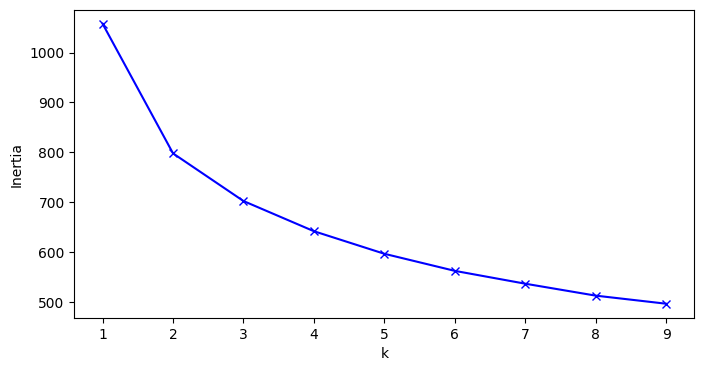

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_inertia(df, kmin=1, kmax=10, figsize=(8, 4)):

    _range = range(kmin, kmax)
    inertias = []
    for k in _range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=figsize)
    plt.plot(_range, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()
    
plot_inertia(df_customer_norm)

Outros métodos podem ser utilizados, como método da raiz quadrada iria gerar um número muito grande de clusters.


**Método da raiz quadrada do número de pontos de dados: Esse método sugere que o número ótimo de clusters é a raiz quadrada do número total de pontos de dados no conjunto de dados. Por exemplo, se você tiver 100 pontos de dados, o número ótimo de clusters seria 10.

Como não existe uma abordagem certa ou errada para essa escolhe, para este caso dos clientes, 2 ou 3 clusters como faixa mais popular, intermediaria e de mais alto padrão.
A regra de negócios pode ditar essa escolha. Mas como está sendo utilizado um número menor de features, podemos pensar em 2 clusters coomo, popular e alto padrão. Ou cliente comum e cliente especial.




In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


### Kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_customer_norm)
clusters=pd.DataFrame(kmeans.labels_, columns=['KMEANS'])
df_result=pd.concat([df_cm_dn_so, clusters], axis=1)
df_result



## DBSCAN

epsilon = 0.3
min_samples = 10

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(df_customer_norm)
clusters=pd.DataFrame(db.labels_, columns=['DBSCAN'])
df_result=pd.concat([df_result, clusters], axis=1)
df_result['DBSCAN'].replace({0:1, 1:0}, inplace=True)
df_result

,Age,Degree,Income,Family,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,KMEANS,DBSCAN
0,66,3,58138.0,1,58,635,88,546,172,88,88,1,-1
1,69,3,46344.0,3,38,11,1,6,2,1,6,0,1
2,58,3,71613.0,2,26,426,49,127,111,21,42,1,-1
3,39,3,26646.0,3,26,11,4,20,10,3,5,0,1
4,42,5,58293.0,3,94,173,43,118,46,27,15,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,56,3,61223.0,3,46,709,43,182,42,118,247,1,-1
2201,77,5,64014.0,5,56,406,0,30,0,0,8,0,-1
2202,42,3,56981.0,1,91,908,48,217,32,12,24,1,-1
2203,67,4,69245.0,3,8,428,30,214,80,30,61,1,-1


**2. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.**

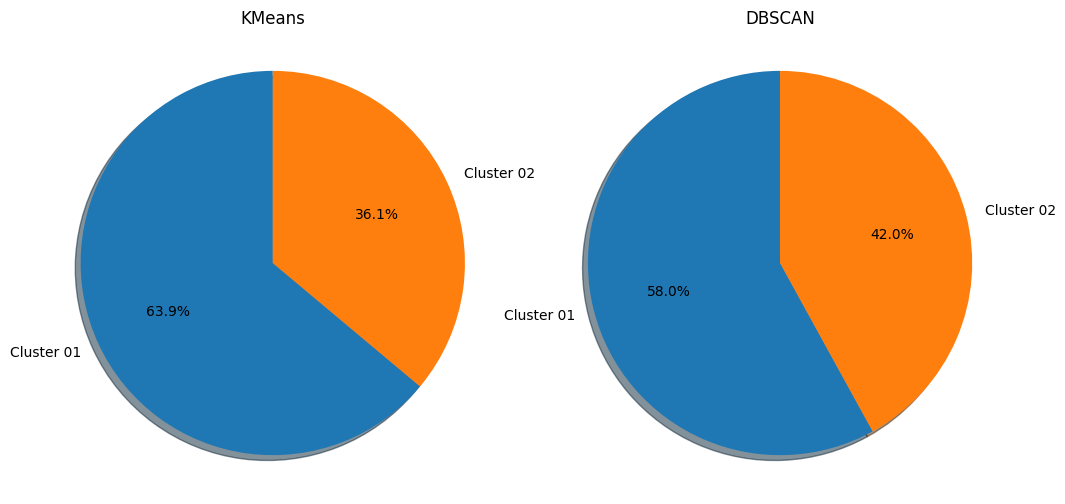

In [17]:


import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True,
                                    figsize=(12, 6))


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels1 = 'Cluster 01', 'Cluster 02' 
labels2 = 'Cluster 01', 'Cluster 02'
sizes0 = df_result['KMEANS'].value_counts(normalize=True)
sizes1 = df_result['DBSCAN'].value_counts(normalize=True)

#fig1, ax1 = plt.subplots()
ax0.set_title('KMeans')
ax0.pie(sizes0, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax0.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title('DBSCAN')
ax1.pie(sizes1, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


No DBSCAN, com epison = 1, o algoritmo retornar 1 cluster, sendo que  corresponde a 99% dos dados. Ajustando para 0.3, o retorno é 1 cluster menor, e o o restante com retorno -1, 
que significa que não pertence a nenhum cluster. Então pelo DBSCAN existe 1 cluster bem definido e o restante está sem cluster. Que pode ser pensado como 1 segmento bem definido e um segmento de outros que corresponde ao restante dos dados. Se modificar o aumentar o Epison o Cluster vai ficar maior, e se diminuir o Epison vai fragmentar em diversos miniclusters. Então, número de clusters escolhido também influênciado pelos resultados do DBSCAN.

Um cluster de familias um pouco maiores de consumo mais baixo, renda mais baixa também

In [18]:
df_result[df_result['DBSCAN']==1].describe().iloc[1:2]

,Age,Degree,Income,Family,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,KMEANS,DBSCAN
mean,52.900704,3.438624,39119.503518,2.950743,48.951525,119.761532,5.946052,39.283034,8.310399,6.09226,20.909304,0.014073,1.0


Um grupo sem cluster, de Consumo mais alto, renda mais alta, e familia menor.

In [19]:
df_result[df_result['DBSCAN']==-1].describe().iloc[1:2]

,Age,Degree,Income,Family,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,KMEANS,DBSCAN
mean,55.74622,3.484881,68890.792657,2.100432,49.088553,563.62635,54.658747,339.384449,78.427646,56.183585,76.029158,0.840173,-1.0


No KMEANS o resultado é semelhante ao DBSCAN, mas com 2 clusters definidos (DBSCAN ficou um cluster e o restante sem cluster) e com a divisão da mesma forma. 

In [20]:
df_result[df_result['KMEANS']==1].describe().iloc[1:2]

,Age,Degree,Income,Family,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,KMEANS,DBSCAN
mean,55.886935,3.506281,72382.295226,2.032663,50.056533,622.154523,60.257538,378.322864,86.726131,61.829146,78.179648,1.0,-0.954774


In [21]:
df_result[df_result['KMEANS']==0].describe().iloc[1:2]

,Age,Degree,Income,Family,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,KMEANS,DBSCAN
mean,53.083747,3.430802,39893.833925,2.910575,48.417317,127.649397,7.277502,44.97374,10.091554,7.524485,24.779986,0.0,0.789922


O KMEANS conforme foi passado, separou em 2 clusters ficando proximas as proposções com o DBSCAN. A principal diferença é que o DBSCAN verificou apenas um CLuster enquanto o KMEANS utiliza o número definido que foi 2. As proposções foram proximas e as diferenças entre os cluster. 7% dos registros ficaram diferentes.

In [22]:
df_result['DBSCAN_1']=df_result['DBSCAN'].replace({-1: 1, 1: 0})
df_result[df_result['KMEANS']!=df_result['DBSCAN_1']]

,Age,Degree,Income,Family,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,KMEANS,DBSCAN,DBSCAN_1
5,56,4,62513.0,3,16,520,42,98,0,42,14,0,-1,1
16,77,3,37760.0,2,20,84,5,38,150,12,28,0,-1,1
20,44,3,2447.0,3,42,1,1,1725,1,1,1,0,-1,1
28,34,4,10979.0,1,34,8,4,10,2,2,4,0,-1,1
58,72,5,67680.0,2,8,546,0,48,0,6,6,0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,52,3,52914.0,3,32,254,10,44,30,10,227,0,-1,1
2165,69,3,50501.0,4,10,297,0,38,13,0,152,0,-1,1
2168,54,3,57731.0,2,0,266,21,300,65,8,44,0,-1,1
2177,68,2,41769.0,2,31,302,29,131,32,0,27,0,-1,1


**3. Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.**

**PCA**

Uma boa forma de avaliar é utilizando o PCA (Principal Component Analysis) é um método utilizado para validação da quantidade de clusters. Na
visualização abaixo, é possível perceber que existe uma uniformidade da distribuição, mas que está mais denso para a esquerda do gráfico e fica mais
espaçado à direita. E que do DBSCAN para o KMEANS o que muda é a fronteira que está mais para a direita no DBSCAN (fruto da definição de Epsilon).
Olhando O PCA é possível também pensar em utilizar 3 clusters pelo KMEANS, separando a perte intermediaria da parte mais espaçada à direita, e da parte
mais comprimida à esquerda.
Como visto na utilização do PCA os dados aparentam ser mais propricios para utilização do KMEANS, podendo ser utilizado com número maior de clusters.


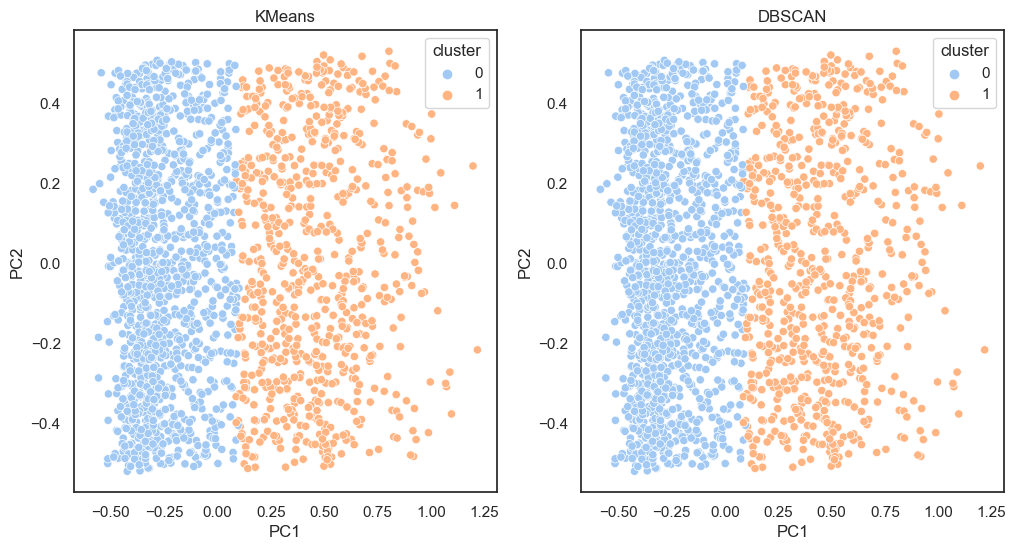

In [45]:
import seaborn as sns
sns.set_theme(style="white", palette="pastel")
def plot_cluster_points2(df, labels1, labels2, ax=None, hue="cluster", legend="auto"):
 fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True,
 figsize=(12, 6))
 pca = PCA(2)
 ax0.set_title('KMeans')
 pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2'])
 pca_data['cluster'] = pd.Categorical(labels1)
 sns.scatterplot(x="PC1", y="PC2", hue=hue, data=pca_data, ax=ax0, legend=legend)
 pca2 = PCA(2)
 ax1.set_title('DBSCAN')
 pca_data2 = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2'])
 pca_data2['cluster'] = pd.Categorical(labels2)
 sns.scatterplot(x="PC1", y="PC2", hue=hue, data=pca_data, ax=ax1, legend=legend)
plot_cluster_points2(df_customer_norm, df_result['KMEANS'], df_result['DBSCAN'])

**Magnitude e Cardinalidade**

As medidas de magnitude e cardinalidade podem ser utilizadas para indicar quanlidade nos agrupamentos, pensando em uma proporsão entre magnitude e cardinalidade entre os clusters encontrados. Utilizando algumas bibliotecas é possível plotar de forma simples o grafico com magnitude, cardinalidade, proporsão entre magnitude e cardinalidade e o PCA.

Com dois clusters, existe uma proporsão maior entre eles, considerando Car. e Mag, conforme o grafico abaixo. Então com 2 os resultados das medidas de qualidade ficam melhores, da para ser utilizado um número maior, mas talvez pensando em outros tratamentos de features nos passos iniciais ou comparar com outros algoritmos de clusterização, esses dados utilziados não tiverem bons resultados para o DBSCAN com epsilon maiores, porque aumenta muito o número de clusters, e não acho que seja a intenção ter mais de 10 segmentos de clientes por exemplo. E para o kmeans fica possível utilizar com número maior, mas com valore inferior de cardinalidade e com os outros clusters encontrados saindo um pouco do padrão dos dois primeiros em relação a essas mesmas metricas.

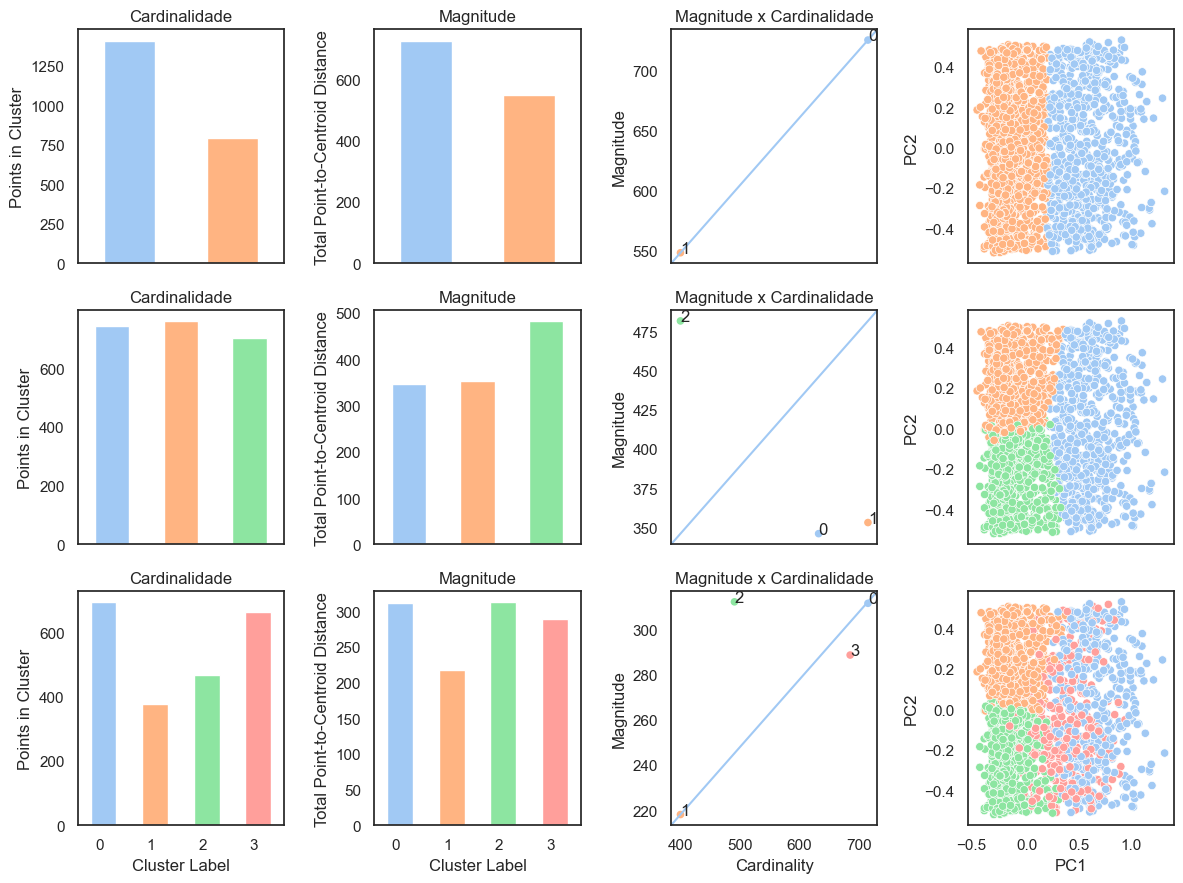

In [44]:
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean

def plot_cluster_points(df, labels, ax=None, hue="cluster", legend="auto"):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(labels)
    sns.scatterplot(x="PC1", y="PC2", hue=hue, data=pca_data, ax=ax, legend=legend)


fig, axs = plt.subplots(3, 4, figsize=(12, 9))
normalized_df=df_customer_norm
for row_idx, k in enumerate([2, 3, 4]):
    
    row_axs = axs[row_idx]
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    k_fit = kmeans.fit(normalized_df)
    
    cluster_colors = list(set(map(lambda x: '#000' if x == -1 else sns.color_palette().as_hex()[x], k_fit.labels_)))

    plot_cluster_cardinality(k_fit.labels_,
                             ax=row_axs[0],
                             title="Cardinalidade",
                             color=cluster_colors
                            )
    plot_cluster_magnitude(normalized_df,
                           k_fit.labels_,
                           k_fit.cluster_centers_,
                           euclidean,
                           ax=row_axs[1],
                           title="Magnitude",
                           color=cluster_colors
                          )
    plot_magnitude_vs_cardinality(normalized_df,
                                  k_fit.labels_,
                                  k_fit.cluster_centers_,
                                  euclidean,
                                  color=cluster_colors[0:k_fit.n_clusters],
                                  ax=row_axs[2], 
                                  title="Magnitude x Cardinalidade")
    
    plot_cluster_points(normalized_df, k_fit.labels_, 
                        hue=list(map(lambda x: cluster_colors[x], k_fit.labels_)), legend=False, ax=row_axs[3])
    

fig.autofmt_xdate(rotation=0)
plt.tight_layout()

O **índice de Calinski-Harabasz** (ou índice CH) é uma medida de validação interna que pode ser utilizada para avaliar a qualidade de um agrupamento de dados

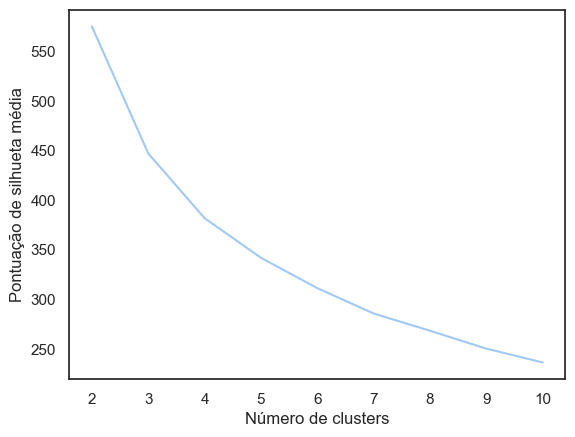

In [24]:
from sklearn.metrics import calinski_harabasz_score


# Para calcular o índice CH, basta chamar a função calinski_harabasz_score
ch_score = calinski_harabasz_score(df_customer_norm, df_result['KMEANS'])

def cluster_kmeans_ch(X, model, folds=5):
    kfold = KFold(n_splits=folds)
    results=[]
    for train_index, test_index in kfold.split(X):
        X_train = X[train_index]
        cluster = model.fit(X_train)
        results.append(calinski_harabasz_score(X_train, cluster.labels_))
    return results


# Definir os valores de n_clusters a serem testados
n_clusters_values = range(2, 11)
y=[]
# Inicializar listas para armazenar os resultados
scores = []
X=df_customer_norm
# Para cada valor de n_clusters, treinar o modelo usando validação cruzada
# e calcular a pontuação de silhueta média
for n_clusters in n_clusters_values:
    model = KMeans(n_clusters=n_clusters)
    scores.append(mean(cluster_kmeans_ch(X, model, folds=5)))
# Plotar o gráfico de n_clusters versus pontuação de silhueta média
plt.plot(n_clusters_values, scores)
plt.xlabel('Número de clusters')
plt.ylabel('Pontuação de silhueta média')
plt.show()


**4.Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?**

O método da silhueta não é ideal para modelo DBSCAN porque o método se baseia em calculos de ditância média.

Em resumo, a diferença entre a distância média do ponto para os demais pontos do seu cluster e a menor distância média para os pontos de outros clusters.
Cada ponto possue seu valor de silhueta e a silhueta média é o valor do indice para avaliar toda a clusterização. O resultado é um valor que varia de 1 a -1, sendo que quanto
mais próximo de 1 melhor o agrupamento, e consequentemente, mais próximo de -1 pior a qualidade do agrupamento.


Porém para o do DBSCAN não significa que um ponto distante de outro ponto seja um agrupamento de menor qualidade. Se o de um ponto a outro se mantem pontos intermediarios mantendo a distância mínima epison entre eles, esses pontos estarão no mesmo cluster, mesmo que entejam distantes entre eles. 

Um exemplo é a imagem abaixo, o dbscan encontra o número de clusters, no caso 2, a grupa conforme a estrutura dos pontos no espaço, na imagem, um circulo azul no centro e um circulo externo vermelho. Os pontos do circulo vermelho teriam indices de silhueta baixos porque a distância de seus pontos para os demais são mais altas que as do cluster azul. O que não significa um agrupamento de menor qualidade se pensar no motivo da utilização do DBSCAN que é encontrar as estruturas de distribuição dos pontos.

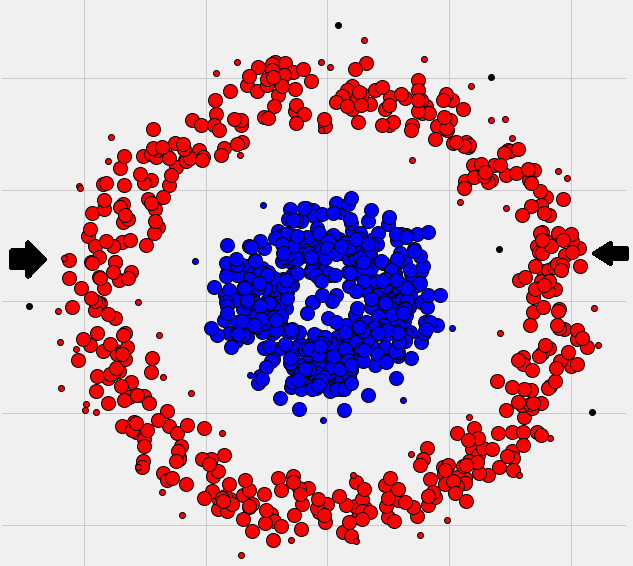

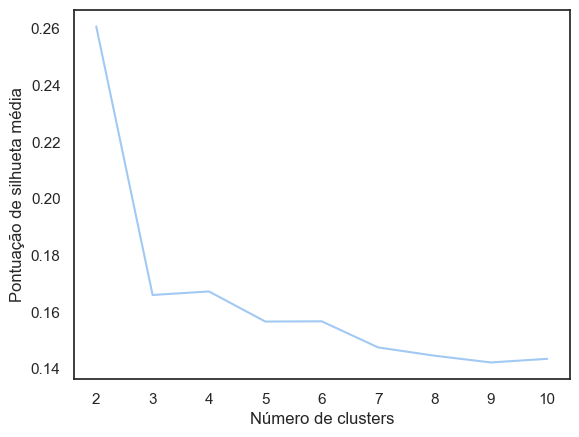

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
import warnings

# Ignorar todos os warnings
warnings.filterwarnings("ignore")

def cluster_kmeans(X, model, folds=5):
    kfold = KFold(n_splits=folds)
    results=[]
    for train_index, test_index in kfold.split(X):
        X_train = X[train_index]
        cluster = model.fit(X_train)
        results.append(silhouette_score(X_train, cluster.labels_))
    return results


# Definir os valores de n_clusters a serem testados
n_clusters_values = range(2, 11)
y=[]
# Inicializar listas para armazenar os resultados
scores = []
X=df_customer_norm
# Para cada valor de n_clusters, treinar o modelo usando validação cruzada
# e calcular a pontuação de silhueta média
for n_clusters in n_clusters_values:
    model = KMeans(n_clusters=n_clusters)
    scores.append(mean(cluster_kmeans(X, model, folds=5)))
# Plotar o gráfico de n_clusters versus pontuação de silhueta média
plt.plot(n_clusters_values, scores)
plt.xlabel('Número de clusters')
plt.ylabel('Pontuação de silhueta média')
plt.show()

##  <span style="color:#2F4F4F">Medidas de similaridade</span>

**1. Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.**

1. Calcular a correlação cruzada entre as 10 séries temporais. Cria o valor de correlação de cada par de features utilizando deslocamento temporal com metodo shift.

2. Com o array das correlações ao longo do deslocamento, é preciso extrair o valor máximo de correlação cruzada para cada série temporal. Método max()

3. Aplicar o algoritmo de clusterização escolhendo 3 clusters.


**2. Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.**

Eu usária o Agruamento Hierárquico, por ser mais robusto que o KMEANS para series temporais com correlação cruzada e pelo que li também o
DBSCAN pode ter dificuldades em lidar com dados de séries temporais altamente correlacionados.



**3. Indique um caso de uso para essa solução projetada.**

Previsão de falhas de equipamentos: A clusterização de séries temporais pode ser usada para identificar padrões em dados de manutenção preventiva de equipamentos, permitindo que as empresas possam prever falhas de equipamentos e tomar medidas preventivas.

**4. Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.**

Distância de Dynamic Time Warping (DTW): A distância de DTW é uma medida de distância específica para séries temporais que leva em conta a similaridade temporal entre as séries